In [283]:
# !pip install pgeocode

In [332]:
import pandas as pd
import pgeocode
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")
#I can ignore warning but usually i solve the warnings.

# Q1.  Write python code that would do the following:

### I.	Create a data frame from the input (File: Delhi-Electricity-SubStation.csv).

In [285]:
df = pd.read_csv('Delhi_Electricity_SubStations.csv')
df.head()

,_id,Substations,Telephone Numbers,Address,Voltage Class,Coordinates
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723"
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269"
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044"
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639"
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015"


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   _id                43 non-null     int64 
 1   Substations        43 non-null     object
 2   Telephone Numbers  40 non-null     object
 3   Address            43 non-null     object
 4   Voltage Class      43 non-null     object
 5   Coordinates        41 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.1+ KB


In [287]:
#Cleaning column name for easiness
col_names = [col.strip().lower().replace('_','').replace(' ','_').replace('-','_') for col in df.columns]
df.columns = col_names
df.head()

,id,substations,telephone_numbers,address,voltage_class,coordinates
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723"
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269"
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044"
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639"
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015"


In [288]:
df.columns

Index(['id', 'substations', 'telephone_numbers', 'address', 'voltage_class',
       'coordinates'],
      dtype='object')

In [289]:
# df.dropna(inplace = True)
# df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))


In [290]:
df.head(50)

,id,substations,telephone_numbers,address,voltage_class,coordinates
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723"
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269"
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044"
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639"
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015"
5,6,DSIDC Bawana,65005603/7290013476,"Near H Block, J.J. colony, Bawana Hanuman Mand...",220 kV,"28.80361, 77.05284"
6,7,DIAL,25655090,"Near IGI Airport, Delhi",220 kV,"28.55616, 77.09995"
7,8,Electric Lane,23329790,"HCM Lane, Behind BSNL Building, Janpath, New D...",220 kV,"28.62174, 77.21969"
8,9,Geeta Colony,22044528,"Near Sai Memorial Public School, Geeta Colony,...",220 kV,"28.65226, 77.26774"
9,10,Gazipur,22770009,"Village Gazipur, Near DDA Janta Flat, Delhi-11...",220 kV,"28.62961, 77.31898"


### II.	In Telephone Numbers there are multiple numbers.  Create separate columns for these Telephone1, Telephone2 etc.

In [291]:
telephone_columns = df['telephone_numbers'].str.split('[/,]', expand=True)
telephone_columns

,0,1,2
0,27791190,1193,1210
1,25314199,25314204,None
2,0120-6500138,None,None
3,65108444,7290010893,None
4,26948637,None,None
5,65005603,7290013476,None
6,25655090,None,None
7,23329790,None,None
8,22044528,None,None
9,22770009,None,None


In [292]:
df = pd.concat([df, telephone_columns.add_prefix('telephone_')], axis=1)
df.head()

,id,substations,telephone_numbers,address,voltage_class,coordinates,telephone_0,telephone_1,telephone_2
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723",27791190,1193,1210
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269",25314199,25314204,None
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044",0120-6500138,None,None
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639",65108444,7290010893,None
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015",26948637,None,None


In [293]:
(df.telephone_1)[0] = '2779'+(df.telephone_1)[0]
(df.telephone_1)[0]


C:\Users\prana\AppData\Local\Temp\ipykernel_4492\4094196942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df.telephone_1)[0] = '2779'+(df.telephone_1)[0]


'27791193'

In [294]:
df.head()

,id,substations,telephone_numbers,address,voltage_class,coordinates,telephone_0,telephone_1,telephone_2
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723",27791190,27791193,1210
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269",25314199,25314204,None
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044",0120-6500138,None,None
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639",65108444,7290010893,None
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015",26948637,None,None


In [295]:
(df.telephone_1)[27] = (df.telephone_1)[27].replace('-','')

C:\Users\prana\AppData\Local\Temp\ipykernel_4492\64663296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df.telephone_1)[27] = (df.telephone_1)[27].replace('-','')


In [296]:
(df.telephone_2)[0] = '2779'+(df.telephone_2)[0]
(df.telephone_2)[0]

C:\Users\prana\AppData\Local\Temp\ipykernel_4492\3702851510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df.telephone_2)[0] = '2779'+(df.telephone_2)[0]


'27791210'

In [297]:
df.head(50)

,id,substations,telephone_numbers,address,voltage_class,coordinates,telephone_0,telephone_1,telephone_2
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723",27791190,27791193,27791210
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269",25314199,25314204,None
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044",0120-6500138,None,None
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639",65108444,7290010893,None
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015",26948637,None,None
5,6,DSIDC Bawana,65005603/7290013476,"Near H Block, J.J. colony, Bawana Hanuman Mand...",220 kV,"28.80361, 77.05284",65005603,7290013476,None
6,7,DIAL,25655090,"Near IGI Airport, Delhi",220 kV,"28.55616, 77.09995",25655090,None,None
7,8,Electric Lane,23329790,"HCM Lane, Behind BSNL Building, Janpath, New D...",220 kV,"28.62174, 77.21969",23329790,None,None
8,9,Geeta Colony,22044528,"Near Sai Memorial Public School, Geeta Colony,...",220 kV,"28.65226, 77.26774",22044528,None,None
9,10,Gazipur,22770009,"Village Gazipur, Near DDA Janta Flat, Delhi-11...",220 kV,"28.62961, 77.31898",22770009,None,None


# Now Telephone numbers are cleaned

### III.	Determine the accuracy of the Coordinates with Address.  Add another column GeoAccuracy.  Find the coordinates using the address.  If the coordinates match exactly with address, then accuracy is 100%, otherwise for every 10 meters off consider a drop in accuracy of 1 %.  For example, if the coordinate of the address is 30 meters away from the given coordinates, the accuracy would be 70%.

In [298]:
# Initialize the Nominatim class from the pgeocode library, specifying the country code 'IN' for India.
geo = pgeocode.Nominatim('IN')

# Define a function named 'get_coordinates' which takes 'data' as input.
def get_coordinates(data):
    # Extract the last 6 characters from the 'data' string, assuming it represents a postal code.
    address = data[-6:]
    
    # Initialize an empty string variable to store the latitude and longitude information.
    my_list = ""
    
    try:
        # Get location information based on the postal code address using the geo object.
        location_info = geo.query_postal_code(address)
        
        # Check if the location information is not empty (i.e., if the address is found).
        if not location_info.empty:
            # Extract latitude and longitude values from the location information.
            latitude = location_info["latitude"]
            longitude = location_info["longitude"]
            
            # Append latitude and longitude to 'my_list'.
            my_list += str(latitude) +','
            my_list += str(longitude)
            
        else:
            # If the address is not found, print a message.
            print("Address is not found")
            
    # Handle any exceptions that might occur during the execution.
    except Exception as e:
        # Print the error message.
        print(f"Error: {str(e)}")
        
    # Return the concatenated string of latitude and longitude.
    return my_list

In [299]:
df["new_coordinates"] = df["address"].apply(get_coordinates)

In [300]:
df

,id,substations,telephone_numbers,address,voltage_class,coordinates,telephone_0,telephone_1,telephone_2,new_coordinates
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723",27791190,27791193,27791210,"28.804991666666663,77.03089166666668"
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269",25314199,25314204,None,"28.5458,77.0784"
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044",0120-6500138,None,None,"28.6114,77.2982"
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639",65108444,7290010893,None,"28.67352727272727,77.01398181818182"
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015",26948637,None,None,"28.5027,77.3084"
5,6,DSIDC Bawana,65005603/7290013476,"Near H Block, J.J. colony, Bawana Hanuman Mand...",220 kV,"28.80361, 77.05284",65005603,7290013476,None,"28.804991666666663,77.03089166666668"
6,7,DIAL,25655090,"Near IGI Airport, Delhi",220 kV,"28.55616, 77.09995",25655090,None,None,"nan,nan"
7,8,Electric Lane,23329790,"HCM Lane, Behind BSNL Building, Janpath, New D...",220 kV,"28.62174, 77.21969",23329790,None,None,"nan,nan"
8,9,Geeta Colony,22044528,"Near Sai Memorial Public School, Geeta Colony,...",220 kV,"28.65226, 77.26774",22044528,None,None,"28.654814285714288,77.27518571428571"
9,10,Gazipur,22770009,"Village Gazipur, Near DDA Janta Flat, Delhi-11...",220 kV,"28.62961, 77.31898",22770009,None,None,"28.6114,77.2982"


In [301]:
df.columns

Index(['id', 'substations', 'telephone_numbers', 'address', 'voltage_class',
       'coordinates', 'telephone_0', 'telephone_1', 'telephone_2',
       'new_coordinates'],
      dtype='object')

In [302]:
# fill nan value with 0
df['coordinates'] = df['coordinates'].fillna('0,0')
df['new_coordinates'] = df['new_coordinates'].fillna('0,0')

In [303]:
# Split the 'coordinates' column in the DataFrame 'df' by the comma (',') and separate into two columns: 'Latitude' and 'Longitude'.
df[['latitude', 'longitude']] = df['coordinates'].str.split(',', expand=True)

# Convert the 'latitude' and 'longitude' columns to float type to ensure numerical representation.
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].astype(float)

# Split the 'new_cordinates' column in the DataFrame 'df' by the comma (',') separate into two columns: 'new_latitude' and 'new_longitude'.
df[['new_latitude', 'new_longitude']] = df['new_coordinates'].str.split(',', expand=True)

# Convert the 'new_latitude' and 'new_longitude' columns to float type to ensure numerical representation.
df[['new_latitude', 'new_longitude']] = df[['new_latitude', 'new_longitude']].astype(float)

# Replace 'nan' values in the 'new_latitude' column with 0.
df['new_latitude'] = df['new_latitude'].apply(lambda x: 0 if x=='nan' else x)

# Replace 'nan' values in the 'new_longitude' column with 0.
df['new_longitude'] = df['new_longitude'].apply(lambda x: 0 if x=='nan' else x)

In [304]:
# Calculate the Euclidean distance between pairs of coordinates (latitude, longitude) and (new_latitude, new_longitude)
# for each row in the DataFrame 'df' and assign the result to a new column named 'distance'.
df['distance'] = df.apply(lambda row: (
                # Square of the difference between latitude and new_latitude
                (row['latitude'] - row['new_latitude']) ** 2 + 
                # Square of the difference between longitude and new_longitude
                (row['longitude'] - row['new_longitude']) ** 2)
                # Square root of the sum of squared differences, resulting in the Euclidean distance
                ** 0.5, axis=1)


In [305]:
df.head()

,id,substations,telephone_numbers,address,voltage_class,coordinates,telephone_0,telephone_1,telephone_2,new_coordinates,latitude,longitude,new_latitude,new_longitude,distance
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723",27791190,27791193,27791210,"28.804991666666663,77.03089166666668",28.79568,77.07230,28.804992,77.030892,0.042442
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269",25314199,25314204,None,"28.5458,77.0784",28.54470,77.03269,28.545800,77.078400,0.045723
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044",0120-6500138,None,None,"28.6114,77.2982",28.71185,77.29044,28.611400,77.298200,0.100749
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639",65108444,7290010893,None,"28.67352727272727,77.01398181818182",28.67671,76.98639,28.673527,77.013982,0.027775
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015",26948637,None,None,"28.5027,77.3084",28.50765,77.30015,28.502700,77.308400,0.009621


In [306]:
def calculate_accuracy(distance):
    # If the distance is exactly 0, the accuracy is 100%
    if distance == 0:
        return str(100)+' %'  
    else:
        # Otherwise, calculate accuracy based on the distance
        # The accuracy is 100% minus a proportion of the distance divided by 10,
        # ensuring that it never goes below 0%
        accuracy = max(0, 100 - (distance / 10))
        return str(np.round(accuracy,3))+' %'                                      #used numpy

In [307]:
df['GeoAccuracy'] = df['distance'].apply(calculate_accuracy)
df.GeoAccuracy

0     99.996 %
1     99.995 %
2      99.99 %
3     99.997 %
4     99.999 %
5     99.998 %
6          0 %
7          0 %
8     99.999 %
9     99.997 %
10    99.999 %
11    99.998 %
12    99.996 %
13    99.997 %
14    99.999 %
15    99.999 %
16         0 %
17    99.997 %
18    99.998 %
19    99.987 %
20    99.998 %
21    99.988 %
22    99.997 %
23         0 %
24    99.995 %
25    99.997 %
26    99.999 %
27    99.983 %
28    99.997 %
29    99.998 %
30    99.999 %
31     91.77 %
32    99.999 %
33    99.996 %
34    99.995 %
35    99.997 %
36    99.993 %
37    91.757 %
38    99.999 %
39         0 %
40    99.995 %
41         0 %
42    99.991 %
Name: GeoAccuracy, dtype: object

In [308]:
df.head()

,id,substations,telephone_numbers,address,voltage_class,coordinates,telephone_0,telephone_1,telephone_2,new_coordinates,latitude,longitude,new_latitude,new_longitude,distance,GeoAccuracy
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723",27791190,27791193,27791210,"28.804991666666663,77.03089166666668",28.79568,77.07230,28.804992,77.030892,0.042442,99.996 %
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269",25314199,25314204,None,"28.5458,77.0784",28.54470,77.03269,28.545800,77.078400,0.045723,99.995 %
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044",0120-6500138,None,None,"28.6114,77.2982",28.71185,77.29044,28.611400,77.298200,0.100749,99.99 %
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639",65108444,7290010893,None,"28.67352727272727,77.01398181818182",28.67671,76.98639,28.673527,77.013982,0.027775,99.997 %
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015",26948637,None,None,"28.5027,77.3084",28.50765,77.30015,28.502700,77.308400,0.009621,99.999 %


# Q 1 is Done

# Q2.  The file MH-Veh-Reg.csv contains data of vehicles registered in Maharashtra for the period 2000-2018.   

Write python code to do the following:


In [309]:
df1 = pd.read_csv('MH_Vehicle_Reg.csv',sep=";")
df1.head(10)

,_id,Sr No.,Year,Region,Sub Region,Motor Cycles,Scooters,Moped,Cars,Jeeps,...,Private Service Vehicles,Ambulances,Articulated/Multi.,Trucks & Lorries,Tanker,Delivery Van (4 wheelers),Delivery Van (3 wheelers),Tractors,Trailors,Others
0,1,1,2000-2001,Greater Mumbai,Mumbai(C),84289,62444,7289,164758,12727,...,829,902,0,9022,1214,9329,4079,867,866,3761
1,2,2,2000-2001,Greater Mumbai,Mumbai(W),80320,96297,15230,110397,5465,...,605,298,0,5637,117,5019,9517,370,127,445
2,3,3,2000-2001,Greater Mumbai,Mumbai(E),39930,44932,9786,42945,4439,...,279,158,0,3811,697,4180,4004,124,170,577
3,4,4,2000-2001,Greater Mumbai,Borivali,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,2000-2001,Thane Region,Thane,130448,104028,9304,96933,23755,...,1030,206,0,42289,8159,21309,8228,1107,4352,740
5,6,6,2000-2001,Thane Region,Kalyan,42910,53177,7143,10968,3183,...,98,96,0,5897,308,1998,3853,141,217,83
6,7,7,2000-2001,Thane Region,Vashi Navi Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,8,2000-2001,Thane Region,Vasai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,9,2000-2001,Panvel Region,Panvel,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,10,2000-2001,Panvel Region,Pen-Raigad,37045,37112,3324,19977,7991,...,152,157,0,8223,628,3855,2784,420,566,384


In [310]:
df1.columns

Index(['_id', 'Sr No.', 'Year', 'Region', 'Sub Region', 'Motor Cycles',
       'Scooters', 'Moped', 'Cars', 'Jeeps', 'Stn. Wagons',
       'Taxis meter fited', 'Luxury /Turist Cabs/', 'Auto-rikshaws',
       'Stage carriages', 'Contract carriages /Mini Bus', 'School Buses',
       'Private Service Vehicles', 'Ambulances', 'Articulated/Multi.',
       'Trucks & Lorries', 'Tanker', 'Delivery Van (4 wheelers)',
       'Delivery Van (3 wheelers)', 'Tractors', 'Trailors', 'Others'],
      dtype='object')

In [311]:
#cleaning column name
col_names = [col.strip().lower().replace('_','').replace('.','').replace(' ','_').replace('-','_').replace('/','_').replace('(','_').replace(')','') for col in df1.columns]
df1.columns = col_names
df1.head()

,id,sr_no,year,region,sub_region,motor_cycles,scooters,moped,cars,jeeps,...,private_service_vehicles,ambulances,articulated_multi,trucks_&_lorries,tanker,delivery_van__4_wheelers,delivery_van__3_wheelers,tractors,trailors,others
0,1,1,2000-2001,Greater Mumbai,Mumbai(C),84289,62444,7289,164758,12727,...,829,902,0,9022,1214,9329,4079,867,866,3761
1,2,2,2000-2001,Greater Mumbai,Mumbai(W),80320,96297,15230,110397,5465,...,605,298,0,5637,117,5019,9517,370,127,445
2,3,3,2000-2001,Greater Mumbai,Mumbai(E),39930,44932,9786,42945,4439,...,279,158,0,3811,697,4180,4004,124,170,577
3,4,4,2000-2001,Greater Mumbai,Borivali,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,2000-2001,Thane Region,Thane,130448,104028,9304,96933,23755,...,1030,206,0,42289,8159,21309,8228,1107,4352,740


In [312]:
df1.columns

Index(['id', 'sr_no', 'year', 'region', 'sub_region', 'motor_cycles',
       'scooters', 'moped', 'cars', 'jeeps', 'stn_wagons', 'taxis_meter_fited',
       'luxury__turist_cabs_', 'auto_rikshaws', 'stage_carriages',
       'contract_carriages__mini_bus', 'school_buses',
       'private_service_vehicles', 'ambulances', 'articulated_multi',
       'trucks_&_lorries', 'tanker', 'delivery_van__4_wheelers',
       'delivery_van__3_wheelers', 'tractors', 'trailors', 'others'],
      dtype='object')

In [313]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            900 non-null    int64 
 1   sr_no                         900 non-null    int64 
 2   year                          900 non-null    object
 3   region                        900 non-null    object
 4   sub_region                    900 non-null    object
 5   motor_cycles                  900 non-null    int64 
 6   scooters                      900 non-null    int64 
 7   moped                         900 non-null    int64 
 8   cars                          900 non-null    int64 
 9   jeeps                         900 non-null    int64 
 10  stn_wagons                    900 non-null    int64 
 11  taxis_meter_fited             900 non-null    int64 
 12  luxury__turist_cabs_          900 non-null    int64 
 13  auto_rikshaws       

### i.	Merge the data of each year (2000-2001, 2001-2002,….) to a single period (2000-2018) by the region and sub region.

In [314]:
# we have year and it is format of 2000-2001 so we split by - and take 0 value
df1["year"] = df1["year"].apply(lambda x:x.split("-")[0])
df1.sample(5)

,id,sr_no,year,region,sub_region,motor_cycles,scooters,moped,cars,jeeps,...,private_service_vehicles,ambulances,articulated_multi,trucks_&_lorries,tanker,delivery_van__4_wheelers,delivery_van__3_wheelers,tractors,trailors,others
465,466,466,2009,Kolhapur Region,Karad,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,271,271,2005,Pune Region,Akluj,13893,4,0,1525,331,...,1,2,0,231,35,643,226,757,430,6
815,816,816,2016,Kolhapur Region,Karad,102115,4797,4387,17239,2049,...,20,155,0,3831,82,5015,1362,6684,6272,320
719,720,720,2014,Pune Region,Baramati,201477,5791,571,23182,4657,...,90,93,3,5935,511,9629,5598,15634,15530,813
628,629,629,2012,Aurangabad Region,Aurangabad,511649,70536,46299,39324,23393,...,1330,398,0,10173,3594,17345,21030,19222,12510,256


In [315]:
# Group the DataFrame by these columns
grouped_df = df1.groupby(["year","region","sub_region"]).sum(numeric_only=True).iloc[:,2:]
# Calculate the sum of numeric columns for each group
# Select all rows and columns starting from the third column (index 2) onwards

grouped_df

motor_cycles  scooters  moped    cars  \
year region          sub_region                                                 
2000 Amrawati Region Akola                     41444     21900  30166    3997   
                     Amrawati                  33351     29795  50414    4178   
                     Buldhana                  27600      6496  13003    1347   
                     Washim                        0         0      0       0   
                     Yawatmal                  24564     13259  24593    2002   
...                                              ...       ...    ...     ...   
2017 Pune Region     Solapur                  568356     81072  72939   51192   
     Thane Region    Kalyan                   601959     76014   9148  123090   
                     Thane                    843715    297194  13608  433402   
                     Vasai                    200000     68550    815   70689   
                     Vashi Navi Mumbai        199046     11253      5  115245   

                                        jeeps  stn_wagons  taxis_meter_fited  \
year region          sub_region                                                
2000 Amrawati Region Akola               4127          12                639   
                     Amrawati            3100         319                322   
                     Buldhana            2131         180                465   
                     Washim                 0           0                  0   
                     Yawatmal            2397          48                357   
...                                       ...         ...                ...   
2017 Pune Region     Solapur            15861         192                 20   
     Thane Region    Kalyan              4487         129                793   
                     Thane              45414        5469               3398   
                     Vasai                276          72                175   
                     Vashi Navi Mumbai   4073         570               1641   

                                        luxury__turist_cabs_  auto_rikshaws  \
year region          sub_region                                               
2000 Amrawati Region Akola                                 0           5823   
                     Amrawati                              0           8260   
                     Buldhana                              0           3245   
                     Washim                                0              0   
                     Yawatmal                              0           3623   
...                                                      ...            ...   
2017 Pune Region     Solapur                            2409          11938   
     Thane Region    Kalyan                             7471          57077   
                     Thane                             38546         107157   
                     Vasai                              5186          17393   
                     Vashi Navi Mumbai                 12570          22324   

                                        stage_carriages  ...  \
year region          sub_region                          ...   
2000 Amrawati Region Akola                          430  ...   
                     Amrawati                       493  ...   
                     Buldhana                       438  ...   
                     Washim                           0  ...   
                     Yawatmal                       399  ...   
...                                                 ...  ...   
2017 Pune Region     Solapur                        292  ...   
     Thane Region    Kalyan                         320  ...   
                     Thane                         1058  ...   
                     Vasai                          791  ...   
                     Vashi Navi Mumbai              304  ...   

                                        private_service_vehicles  ambulances  \
year

### ii.	Write a function that would take year as parameter and plot a graph.  Classify the vehicles into 3 categories Private, Commercial and Others.  Commercial vehicles will have 2 subcategories Light Motor Vehicles (LMV) and Heavy Motor Vehicles (HMV).  Use different colors for each type of vehicle and also show the legend.  The graph should show both the values and percentages.

Note:  
    
I.	Consider Motorcycles, Scooters, Moped, Cars, Jeeps, Stn. Wagons and Private Service Vehicles as Private and rest as Commercial.

II.	Bus, Truck, Trailer, Tractor, Tanker, Stage/Contract carriage are all HMV and rest LMV.

In [316]:
df2 = df1.groupby("year").sum(numeric_only=True).iloc[:,2:]
df2.head()

,motor_cycles,scooters,moped,cars,jeeps,stn_wagons,taxis_meter_fited,luxury__turist_cabs_,auto_rikshaws,stage_carriages,...,private_service_vehicles,ambulances,articulated_multi,trucks_&_lorries,tanker,delivery_van__4_wheelers,delivery_van__3_wheelers,tractors,trailors,others
year,,,,,,,,,,,,,,,,,,,,,
2000,2151944,1394472,972935,692212,216998,12718,89308,0,413828,27338,...,6248,4052,0,194480,18834,121306,69449,176421,171222,10058
2001,2540274,1542122,1040730,757229,230427,12662,97081,0,440018,26439,...,6099,4187,0,199787,19514,129328,77063,186675,179995,10199
2002,2988428,1497876,1101358,831261,244025,12599,94920,0,463550,26991,...,5997,4434,0,208309,19889,138138,90019,194902,186100,10678
2003,3493179,1562751,1160864,924006,262741,12609,102475,0,493142,27576,...,6361,4894,4618,217019,21476,149912,106170,201940,190628,11217
2004,4072397,1640891,1213288,1039800,283016,12613,113380,0,515249,29024,...,7605,5823,7288,234950,23766,167455,126388,212466,197169,12444


In [317]:
df2.columns

Index(['motor_cycles', 'scooters', 'moped', 'cars', 'jeeps', 'stn_wagons',
       'taxis_meter_fited', 'luxury__turist_cabs_', 'auto_rikshaws',
       'stage_carriages', 'contract_carriages__mini_bus', 'school_buses',
       'private_service_vehicles', 'ambulances', 'articulated_multi',
       'trucks_&_lorries', 'tanker', 'delivery_van__4_wheelers',
       'delivery_van__3_wheelers', 'tractors', 'trailors', 'others'],
      dtype='object')

In [318]:
df2['Private'] = (
    df2['motor_cycles'] +  # Count of Motor Cycles
    df2['scooters'] +       # Count of Scooters
    df2['moped'] +          # Count of Moped
    df2['cars'] +           # Count of Cars
    df2['jeeps'] +          # Count of Jeeps
    df2['stn_wagons'] +    # Count of Stn. Wagons
    df2['private_service_vehicles'] ) # Count of Private Service Vehicles

df2.head()

,motor_cycles,scooters,moped,cars,jeeps,stn_wagons,taxis_meter_fited,luxury__turist_cabs_,auto_rikshaws,stage_carriages,...,ambulances,articulated_multi,trucks_&_lorries,tanker,delivery_van__4_wheelers,delivery_van__3_wheelers,tractors,trailors,others,Private
year,,,,,,,,,,,,,,,,,,,,,
2000,2151944,1394472,972935,692212,216998,12718,89308,0,413828,27338,...,4052,0,194480,18834,121306,69449,176421,171222,10058,5447527
2001,2540274,1542122,1040730,757229,230427,12662,97081,0,440018,26439,...,4187,0,199787,19514,129328,77063,186675,179995,10199,6129543
2002,2988428,1497876,1101358,831261,244025,12599,94920,0,463550,26991,...,4434,0,208309,19889,138138,90019,194902,186100,10678,6681544
2003,3493179,1562751,1160864,924006,262741,12609,102475,0,493142,27576,...,4894,4618,217019,21476,149912,106170,201940,190628,11217,7422511
2004,4072397,1640891,1213288,1039800,283016,12613,113380,0,515249,29024,...,5823,7288,234950,23766,167455,126388,212466,197169,12444,8269610


In [319]:
df2.columns

Index(['motor_cycles', 'scooters', 'moped', 'cars', 'jeeps', 'stn_wagons',
       'taxis_meter_fited', 'luxury__turist_cabs_', 'auto_rikshaws',
       'stage_carriages', 'contract_carriages__mini_bus', 'school_buses',
       'private_service_vehicles', 'ambulances', 'articulated_multi',
       'trucks_&_lorries', 'tanker', 'delivery_van__4_wheelers',
       'delivery_van__3_wheelers', 'tractors', 'trailors', 'others',
       'Private'],
      dtype='object')

In [320]:
df2['commercial_HMV'] = (df2['school_buses'] + 
                                        df2['contract_carriages__mini_bus'] +
                                        df2['trucks_&_lorries'] + 
                                        df2['tanker'] + 
                                        df2['stage_carriages']+ 
                                        df2['tractors'] + 
                                        df2['trailors']) #7 Heavy Motor Vehiclesdf2

In [322]:
df2['Commercial_LMV'] = (df2['taxis_meter_fited'] +
                                        df2['luxury__turist_cabs_'] +
                                        df2['auto_rikshaws'] +
                                        df2['ambulances']+
                                        df2['articulated_multi']+
                                        df2['delivery_van__4_wheelers']+
                                        df2['delivery_van__3_wheelers']) #8 Light Motor Vehiclesdf2

In [323]:
final_df = df2.iloc[:,-4:]
final_df

,others,Private,commercial_HMV,Commercial_LMV
year,,,,
2000,10058,5447527,603946,697943
2001,10199,6129543,626152,747677
2002,10678,6681544,650554,791061
2003,11217,7422511,673794,861211
2004,12444,8269610,718328,935583
2005,14957,9180227,762160,1009090
2006,17576,9357030,746291,1168525
2007,21320,11189433,893566,1171422
2008,24080,12200293,964651,1261864


In [324]:
temp = final_df[final_df.index== '2017'].reset_index()
temp

,year,others,Private,commercial_HMV,Commercial_LMV
0,2017,63290,28739823,1768382,2317648


In [326]:
temp = temp.melt(
    id_vars=['year'],            # Columns to keep as is (non-melted)
    var_name='Category',         # Name to assign to the melted column containing variable names
    value_name='Count'           # Name to assign to the melted column containing variable values
)


In [327]:
# Calculate the percentage of each 'Count' value relative to the total count
temp['Percentage'] = (temp['Count'] / temp['Count'].sum()) * 100

# Round the percentages to two decimal places
temp['Percentage'] = np.round(temp['Percentage'], 2)

# Convert the rounded percentages to strings and append a '%' sign to each value
temp['Percentage'] = temp['Percentage'].apply(lambda x: str(x) + "%")

# Display the DataFrame 'temp'
temp


,year,Category,Count,Percentage
0,2017,others,63290,0.19%
1,2017,Private,28739823,87.38%
2,2017,commercial_HMV,1768382,5.38%
3,2017,Commercial_LMV,2317648,7.05%


In [340]:
def generate_plot(year):
    # Filter data for the specified year
    temp = final_df[final_df.index == str(year)].reset_index()
    temp = temp.melt(id_vars=['year'], var_name='category', value_name='count')
    temp['Percentage'] = (temp['count'] / temp['count'].sum()) * 100
    temp['Percentage'] = temp['Percentage'].round(2)
    temp['Percentage'] = temp['Percentage'].astype(str) + "%"
    colors = ['blue', 'green', 'red', 'orange']
    
    # Create a bar plot using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.bar(temp['category'], temp['count'], color=colors)
    plt.xlabel('Category')
    plt.ylabel('Vehicle Count')
    plt.title(f'Vehicle Classification for Year {year}')
    plt.xticks(rotation=45, ha='right')
    
    # Display count values on the bars
    for i, count in enumerate(temp['count']):
        plt.text(i, count + 1, temp['Percentage'][i], ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

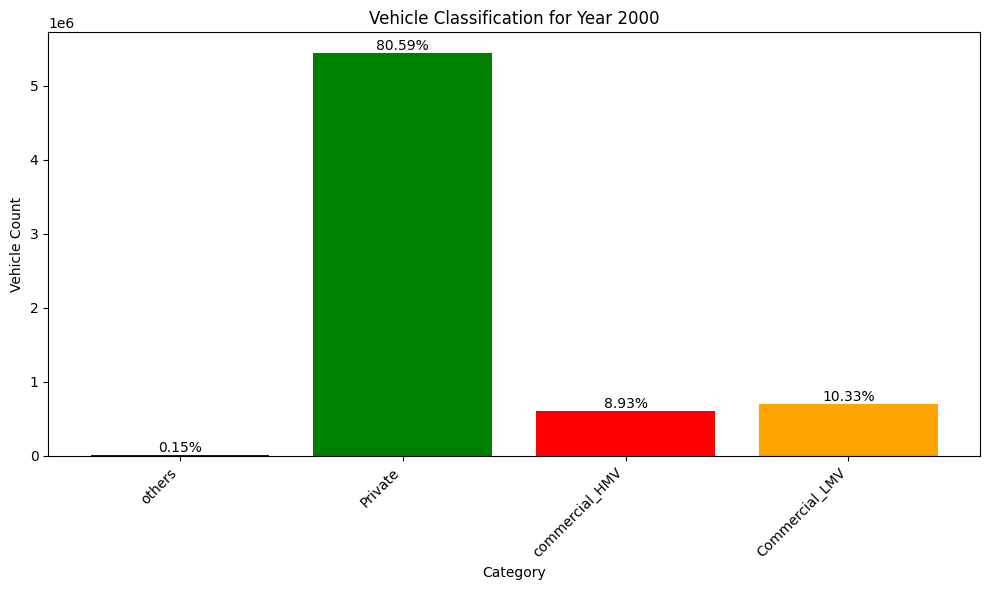

In [341]:
generate_plot(2000)

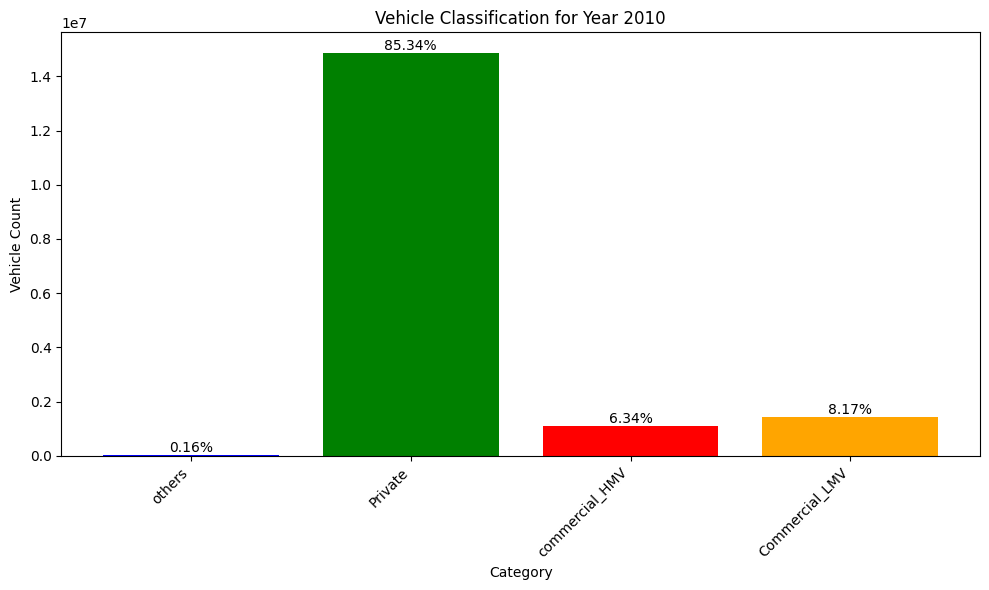

In [342]:
generate_plot(2010)

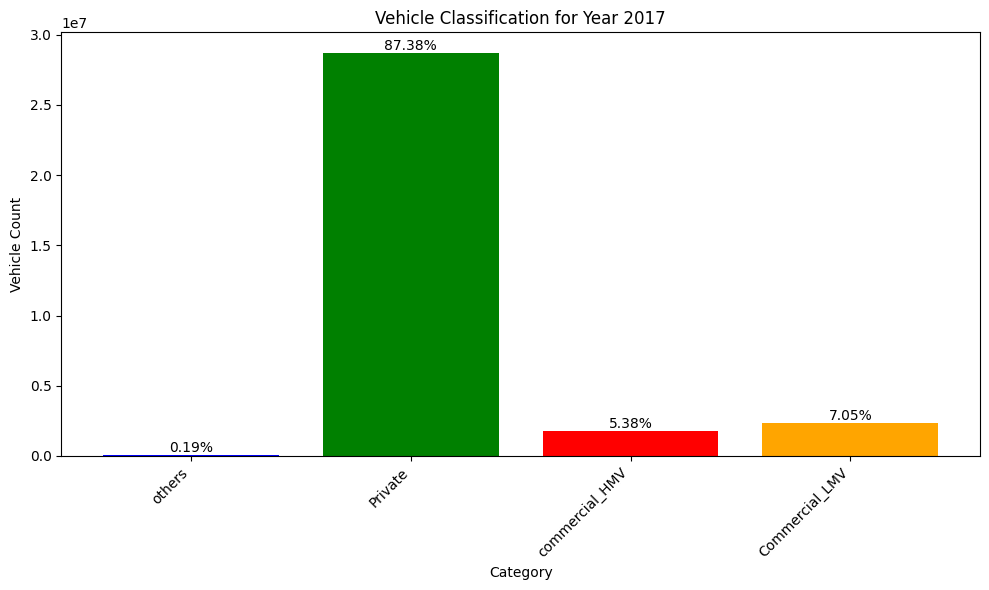

In [343]:
generate_plot(2017)

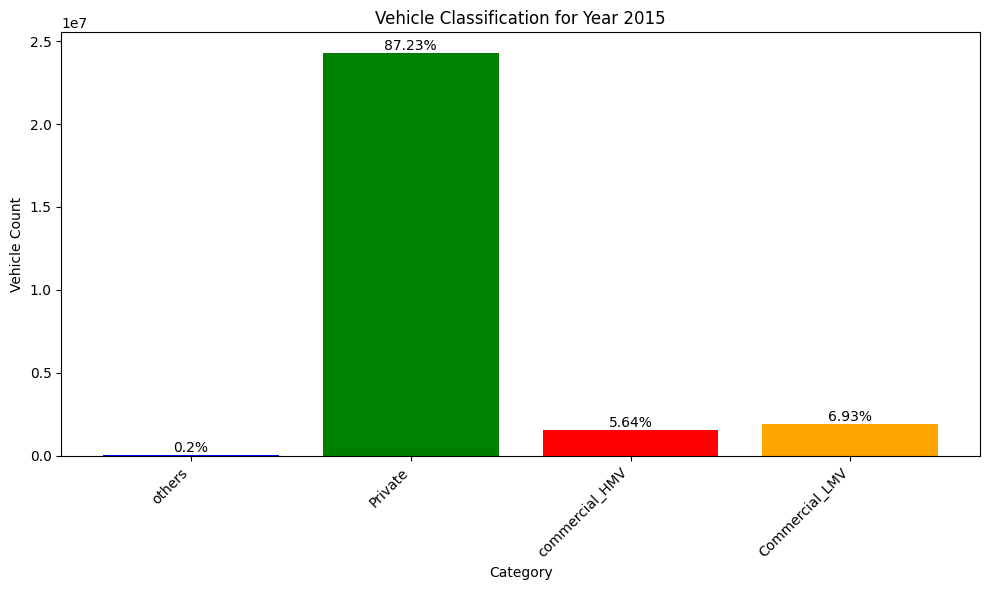

In [344]:
generate_plot(2015)